In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [3]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [4]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]
len(df)

201

In [5]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [9]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  3.335409621457654
RMSE:  1.8263103847532747
MAE:  1.3321803925332953
ESV:  0.4973884956852528


In [15]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)

In [18]:
type(y)

numpy.ndarray

In [19]:
type(predictions)

numpy.ndarray

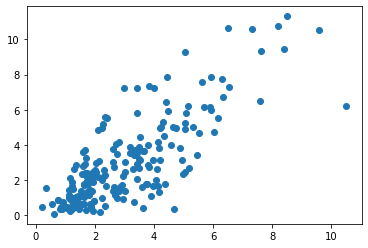

In [22]:
plt.scatter(predictions,y)